In [61]:
# change frontier words from Martin to dictonary for vectorizer
with open (r'C:\Users\Blamo\Documents\cs506\frontier words.txt','r') as f:
#    frontier = f.read().replace("'","").replace("\n","").replace(" ","").split(',')
    frontier = f.read().replace("'","").replace("\n","").split(',')
    frontier1 = []
    for i in range(0,len(frontier)):
        frontier1.append(frontier[i].lstrip().rstrip())
        f_dic = {frontier[i].lstrip().rstrip() : i for i in range(len(frontier))}

#    print(frontier1)
#    print(len(frontier1))
#    print(f_dic)

In [62]:
#open all files needed and store it 
from sklearn.feature_extraction.text import CountVectorizer
import os
import glob
import numpy as np
import operator

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#i/p document file path and frontier word list, 
#o/p 1. a list of word number in each document
#    2. an array contains each frontier word importance rank
#    3. a corpus for next step
#    4. the weight parameter matrix
def operations(path,f_list,name): 
    corpus = [] #list of all document as strings
#    tfidf = {}
#    listdic = []
#    wordlist = []#a list of all different words in each docuement
#    tlist = []
    
    for filename in glob.glob(os.path.join(path, name+'*.txt')):
        with open (filename,'r') as C:
            corpus.append(C.read()) #get a list of strings
#        for i in corpus:#for each chapter separately

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    Xarray = X.toarray()#word frequency array for all words in the document词频矩阵
    
    num = [] #list of number of different words in each document
    for i in Xarray:
        num.append(np.count_nonzero(i))
    
    word = vectorizer.get_feature_names()#list of all words in above string
    word_array = np.array(word)
    
    
        
        
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(X)
    tfidf_array = tfidf.toarray()#array of tfidf scores of all word appeared 

#    print(word_array)
#    print(tfidf_array.shape)
#    print(num)
#    print(len(word))
#    print(word)
     
# get the tfidf array
    list_of_tlist = [] 
    for j in tfidf_array: #tfidf list for each document, j is each row
        list_tfidf = []
        for l in f_list:
            if l in word:
                list_tfidf.append(j[word.index(l)])
            else:
                list_tfidf.append(0)
        list_of_tlist.append(list_tfidf)        
    #print(list_of_tlist)
    frontier_tarray = np.array(list_of_tlist)
    print(frontier_tarray.shape)
    
    return frontier_tarray

In [63]:
def operations2(path,f_list,name): 
    corpus = [] #list of all document as strings
#    tfidf = {}
#    listdic = []
#    wordlist = []#a list of all different words in each docuement
#    tlist = []
    
    for filename in glob.glob(os.path.join(path, name+'*.txt')):
        with open (filename,'r',encoding='UTF-8') as C:
            corpus.append(C.read()) #get a list of strings
#    print(type(corpus[0]))
            #print(filename)
#        for i in corpus:#for each chapter separately

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    Xarray = X.toarray()#word frequency array for all words in the document词频矩阵
    
    num = [] #list of number of different words in each document
    for i in Xarray:
        num.append(np.count_nonzero(i))
    
    word = vectorizer.get_feature_names()#list of all words in above string
    word_array = np.array(word)
    
    
        
        
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(X)
    tfidf_array = tfidf.toarray()#array of tfidf scores of all word appeared 

#    print(word_array)
#    print(tfidf_array.shape)
#    print(tfidf_array[-1,-2])
#    print(num)
#    print(len(word))
#    print(word)
     

    list_of_tlist = [] #list of sorted tfidf dics, only for words in each doc
    for j in tfidf_array: #tfidf list for each document, j is each row
        list_tfidf = []
        for l in f_list:
            if l in word:
                list_tfidf.append(j[word.index(l)])
            else:
                list_tfidf.append(0)
        list_of_tlist.append(list_tfidf)        
    #print(list_of_tlist)
    frontier_tarray = np.array(list_of_tlist)
    #print(frontier_tarray[0])
    
    

#    tfidf2 = TfidfVectorizer()
#    re = tfidf2.fit_transform(corpus)
#    re_array = re.toarray()
#    print (re_array[-1,-2])
#    print(re_array==tfidf_array)
    
    
    return frontier_tarray

In [64]:
path1 = r'C:\Users\Blamo\Documents\cs506\Turner'
f_array = operations(path1,frontier1,'Chapter')


(13, 66)


In [67]:
mean_array = np.mean(f_array,axis = 1)
max_array = np.max(f_array,axis = 1)
min_array = np.min(f_array,axis = 1)
sum_array = np.sum(f_array,axis = 1)

ref_mean = np.mean(mean_array)
ref_max = np.mean(max_array)
ref_min = np.mean(min_array)
ref_sum = np.mean(sum_array)

print("ref_mean = ",ref_mean)
print("ref_max = ",ref_max)
print("ref_min = ",ref_min)
print("ref_sum = ",ref_sum)

ref_mean =  0.0006872298443328215
ref_max =  0.01899943650073424
ref_min =  0.0
ref_sum =  0.04535716972596619


In [66]:
import matplotlib.pyplot as plt

path2 = r'C:\Users\Blamo\Documents\cs506\political_platform\political_platforms'
path3 = r'C:\Users\Blamo\Documents\cs506\political_platform\political_platforms'

x = np.linspace(1840,2016,num = 45)
x2 = np.linspace(1856,2016,num = 41)

#for Democratics
final_array_democ = operations2(path2,frontier1,'Democratic ')
#mean
mean_each_doc_democ = np.mean(final_array_democ,axis = 1)
mean_democ = np.mean(mean_each_doc_democ)
print("mean_democ = ",mean_democ)
#max
max_each_doc_democ = np.max(final_array_democ,axis = 1)
max_democ = np.mean(max_each_doc_democ)
print("max_democ = ",max_democ)
#min
min_each_doc_democ = np.min(final_array_democ,axis = 1)
min_democ = np.mean(min_each_doc_democ)
print("min_democ = ",min_democ)
#sum
sum_each_doc_democ = np.sum(final_array_democ,axis = 1)
sum_democ = np.mean(sum_each_doc_democ)
print("sum_democ = ",sum_democ)

mean_democ =  0.00048059118216530925
max_democ =  0.012535828006019201
min_democ =  0.0
sum_democ =  0.031719018022910404


In [57]:
#for Republicans
final_array_rep = operations2(path2,frontier1,'Republicans ')

#mean
mean_each_doc_rep = np.mean(final_array_rep,axis = 1)
mean_rep = np.mean(mean_each_doc_rep)
print("mean_rep = ",mean_rep)
#max
max_each_doc_rep = np.max(final_array_rep,axis = 1)
max_rep = np.mean(max_each_doc_rep)
print("max_rep = ",max_rep)
#min
min_each_doc_rep = np.min(final_array_rep,axis = 1)
min_rep = np.mean(min_each_doc_rep)
print("min_rep = ",min_rep)
#sum
sum_each_doc_rep = np.sum(final_array_rep,axis = 1)
sum_rep = np.mean(sum_each_doc_rep)
print("sum_rep = ",sum_rep)

mean_rep =  0.0005124748530281487
max_rep =  0.012842966728844893
min_rep =  0.0
sum_rep =  0.03382334029985782


[0.01576057 0.02798948 0.02406204 0.01334686 0.0234471  0.02072849
 0.03385269 0.012711   0.01477874 0.01151395 0.         0.0527919
 0.02107628 0.00785338 0.02927144 0.03026388 0.04682539 0.01715322
 0.02444663 0.03325548 0.0242282  0.02237391 0.03531063 0.01487769
 0.07073823 0.10916761 0.0210153  0.06520363 0.07157439 0.04885205
 0.0488269  0.0637979  0.04624396 0.02984258 0.03962378 0.02916835
 0.06458578 0.06078216 0.09902872 0.06683592 0.04434891 0.06886262
 0.0467417  0.03453875 0.03748526]


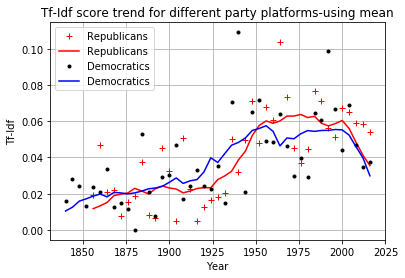

In [69]:
#plt.plot(x,mean_each_doc_democ,'r+')
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

y = mean_each_doc_democ/(max_democ-min_democ)
y2 = mean_each_doc_rep/(max_democ-min_democ)
#print(mean_each_doc_democ)
print(y)
ymax = max_each_doc_democ
ymax2 = max_each_doc_rep
ymin = min_each_doc_democ
ymin2 = min_each_doc_rep
ysum = sum_each_doc_democ
ysum2 = sum_each_doc_rep

#mean
#plt.ylim(0,0.1)

plt.plot(x2,y2,'r+',label = 'Republicans')
y2_av = movingaverage(y2, 10) #average every 40 years
plt.plot(x2, y2_av,"r-",label = 'Republicans')

plt.plot(x,y,"k.", label = 'Democratics')
y_av = movingaverage(y, 10)
plt.plot(x, y_av,"b-", label = 'Democratics')

plt.title("Tf-Idf score trend for different party platforms-using mean")
plt.xlabel("Year")
plt.ylabel("Tf-Idf")
plt.grid(True)
plt.legend(loc= 'best')
plt.show()


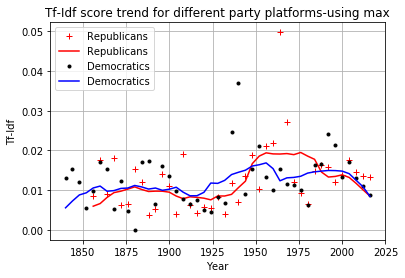

In [50]:
#max
plt.plot(x2,ymax2,'r+',label = 'Republicans')
ymax2_av = movingaverage(ymax2, 10) #average every 40 years
plt.plot(x2, ymax2_av,"r-",label = 'Republicans')

plt.plot(x,ymax,"k.", label = 'Democratics')
ymax_av = movingaverage(ymax, 10)
plt.plot(x, ymax_av,"b-", label = 'Democratics')

plt.title("Tf-Idf score trend for different party platforms-using max")
plt.xlabel("Year")
plt.ylabel("Tf-Idf")
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

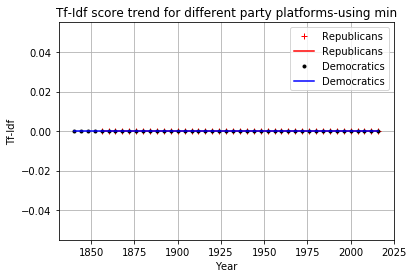

In [51]:
#min
plt.plot(x2,ymin2,'r+',label = 'Republicans')
ymin2_av = movingaverage(ymin2, 10) #average every 40 years
plt.plot(x2, ymin2_av,"r-",label = 'Republicans')

plt.plot(x,ymin,"k.", label = 'Democratics')
ymin_av = movingaverage(ymin, 10)
plt.plot(x, ymin_av,"b-", label = 'Democratics')

plt.title("Tf-Idf score trend for different party platforms-using min")
plt.xlabel("Year")
plt.ylabel("Tf-Idf")
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

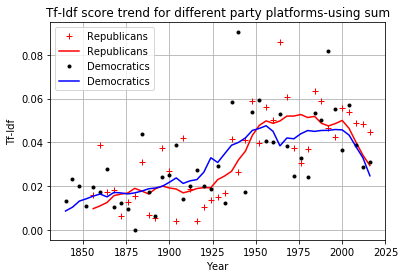

In [52]:
#sum
plt.plot(x2,ysum2,'r+',label = 'Republicans')
ysum2_av = movingaverage(ysum2, 10) #average every 40 years
plt.plot(x2, ysum2_av,"r-",label = 'Republicans')

plt.plot(x,ysum,"k.", label = 'Democratics')
ysum_av = movingaverage(ysum, 10)
plt.plot(x, ysum_av,"b-", label = 'Democratics')

plt.title("Tf-Idf score trend for different party platforms-using sum")
plt.xlabel("Year")
plt.ylabel("Tf-Idf")
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

In order to make the calculation more efficient, the first step needed in seeing the trending of "frontierness change" is to reduce the total dimension of the dataset. In this project, we reduced dimension of the dataset by calculatiing the mean (&sum), maximum, minimum across all the dimensions to see if they can show a trending.

To make the trend line smoother, moving average is used to combine data with a certain window size. From the comparison of the plot we can see that the mean and sum method have the clearest trending. As the scale between sum and mean are different, sum method shows a clear trending. 
From the mean and max score for different dataset, we can see there is not much difference between the frontier literatures and the test literatures. After thinking about the reason, this may because it is the comparison in Tf-Idf score across all unique words in that document which decide the importance of that word in the document, not the score alone. So directly compare Tf-Idf score across different documents may be in accurate to show the importance trend. In order to improve the method. We introduced another term to take the unique word number and rank into account. 
(Although the rank is from the comparison of Tfidf score, it's not only related to the Tfidf score of the single word that we are looking at currently. So the rank won't cancel with the Tfidf score which are the first two terms. )